<a href="https://colab.research.google.com/github/HibaIbrahimi/AFC_project/blob/main/Satellite_imagery_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1 : Data Processing


In [95]:
!pip install patchify

In [96]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler , StandardScaler

from matplotlib import pyplot as plt
import random

In [97]:
minmaxscaler = MinMaxScaler()

In [98]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset'

total 33K
-rw------- 1 root root  548 Mar  6 21:59  classes.json
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 1'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 2'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 3'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 4'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 5'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 6'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 7'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 8'


In [99]:
dataset_root_folder ='/content/drive/MyDrive/Colab Notebooks/Datasets'

In [100]:
dataset_name = 'Satellite_Imagery_dataset'

In [101]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    print(images)
    for i , image_name in enumerate (images):
      if (image_name.endswith('.jpg')):
       print(image_name)

['image_part_007.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_009.jpg', 'image_part_008.jpg', 'image_part_001.jpg', 'image_part_002.jpg', 'image_part_005.jpg', 'image_part_006.jpg']
image_part_007.jpg
image_part_003.jpg
image_part_004.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
image_part_002.jpg
image_part_005.jpg
image_part_006.jpg
['image_part_007.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_006.jpg', 'image_part_009.jpg', 'image_part_005.jpg', 'image_part_001.jpg', 'image_part_008.jpg']
image_part_007.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_006.jpg
image_part_009.jpg
image_part_005.jpg
image_part_001.jpg
image_part_008.jpg
['image_part_007.jpg', 'image_part_002.jpg', 'image_part_001.jpg', 'image_part_009.jpg', 'image_part_008.jpg', 'image_part_004.jpg', 'image_part_006.jpg', 'image_part_003.jpg', 'image_part_005.jpg']
image_part_007.jpg
image_part_002.jpg
image_part_001.jpg
imag

In [102]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks':
    images = os.listdir(path)
    print(path)
    #print(images)
    for i , image_name in enumerate (images):
      if (image_name.endswith('.png')):
       #print(image_name)
       a = True

/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 4/masks


In [103]:
image_patch_size= 256

In [104]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [105]:
image.shape

(544, 509, 3)

In [106]:
image_paches= patchify(image,(image_patch_size,image_patch_size,3), step=image_patch_size)

In [107]:
len(image_paches)

2

In [108]:
print(image_paches.shape)

(2, 1, 1, 256, 256, 3)


In [109]:
#minmaxscaler
image_x = image_paches[0,0,:,:]
minmaxscaler = MinMaxScaler()
image_y = minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)

In [110]:
image_y[0].shape

(256, 256, 3)

In [111]:
print(type(image))

<class 'numpy.ndarray'>


In [112]:
type(Image.fromarray(image))

PIL.Image.Image

array([[[ 57,  72,  81],
        [ 50,  65,  74],
        [ 72,  84,  94],
        ...,
        [ 77,  85, 115],
        [ 77,  86, 124],
        [ 76,  87, 131]],

       [[ 53,  67,  79],
        [ 60,  75,  84],
        [ 82,  94, 106],
        ...,
        [ 83,  88, 119],
        [ 76,  85, 123],
        [ 69,  80, 124]],

       [[ 67,  78,  92],
        [101, 113, 125],
        [107, 116, 130],
        ...,
        [ 86,  91, 122],
        [ 84,  91, 130],
        [ 79,  88, 132]],

       ...,

       [[111, 107, 102],
        [102,  98,  93],
        [ 85,  81,  76],
        ...,
        [ 97,  91,  96],
        [105, 101, 106],
        [121, 120, 122]],

       [[127, 124, 119],
        [141, 138, 133],
        [135, 133, 125],
        ...,
        [ 99,  93,  98],
        [109, 105, 110],
        [105, 104, 106]],

       [[163, 163, 157],
        [178, 178, 172],
        [159, 157, 149],
        ...,
        [101,  95, 100],
        [111, 107, 112],
        [ 97,  94,  96]]], dtype=uint8)
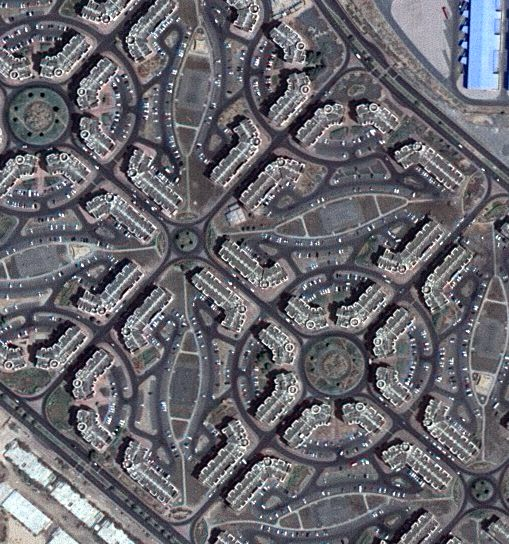

In [113]:
image

In [114]:
image.shape

(544, 509, 3)

In [115]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [116]:
image_dataset = []
mask_dataset = []


for image_type in ['images','masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png'
  for tile_id in range (1,8):
    for image_id in range (1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':      #change mask images from rgb tp bgr
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0,size_x,size_y))
        #print("{}, {}".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image,(image_patch_size,image_patch_size,3), step=image_patch_size)
        #print(len(patched_images))
        for i in range (patched_images.shape[0]):
          for j in range (patched_images.shape[1]):

            if image_type == 'images':

              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image =  individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)

            elif image_type == 'masks':

              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)




In [117]:
print(len(image_dataset))
print(len(mask_dataset))


945
945


In [118]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [119]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [120]:
type(image_dataset[0])

numpy.ndarray

In [121]:
type(np.reshape(image_dataset[0],(image_patch_size,image_patch_size,3)))

numpy.ndarray

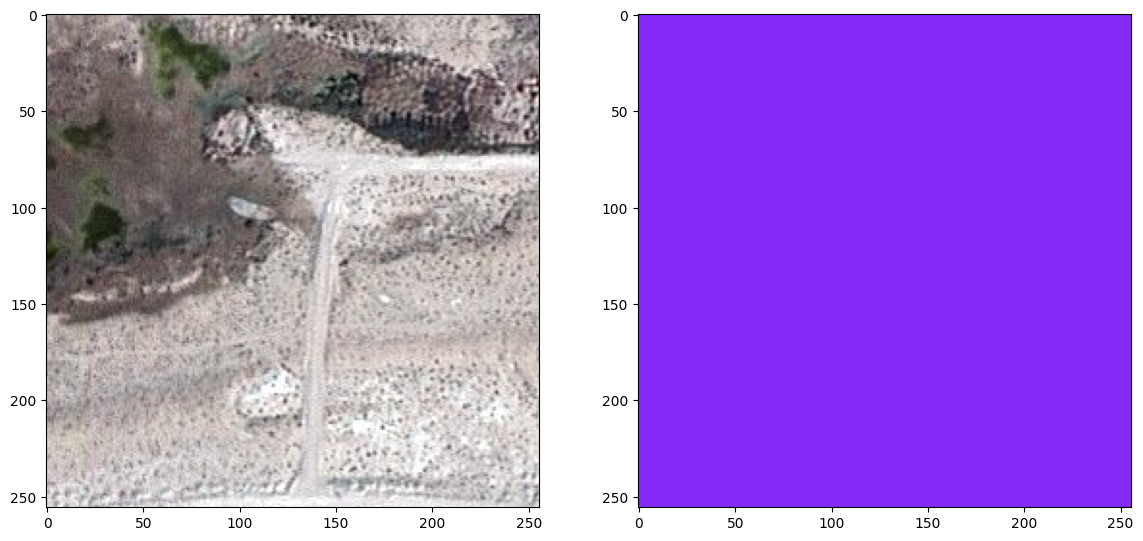

In [122]:
random_image_id = random.randint(0,len(image_dataset))

plt.figure(figsize = (14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

next step , we gonna process the labels :
it's abt applying one hot encoding with labels hex image type to set RGB/label

In [123]:

class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [124]:
mask_dataset.shape

(945, 256, 256, 3)

In [125]:
#make sure that the label is equal to his patsch mask
label = individual_patched_mask

In [126]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape , dtype=np.uint8 )

  label_segment[np.all(label == class_water, axis= -1)] = 0
  label_segment[np.all(label == class_land, axis= -1)] = 1
  label_segment[np.all(label == class_road, axis= -1)] = 2
  label_segment[np.all(label == class_building, axis= -1)] = 3
  label_segment[np.all(label == class_vegetation, axis= -1)] = 4
  label_segment[np.all(label == class_unlabeled, axis= -1)] = 5

  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)

  return label_segment

In [127]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)


In [128]:
print(len(labels))

945


In [129]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
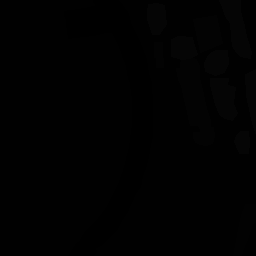

In [130]:
labels[0]

In [131]:
labels = np.expand_dims(labels,axis = 3)

In [132]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [133]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [134]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


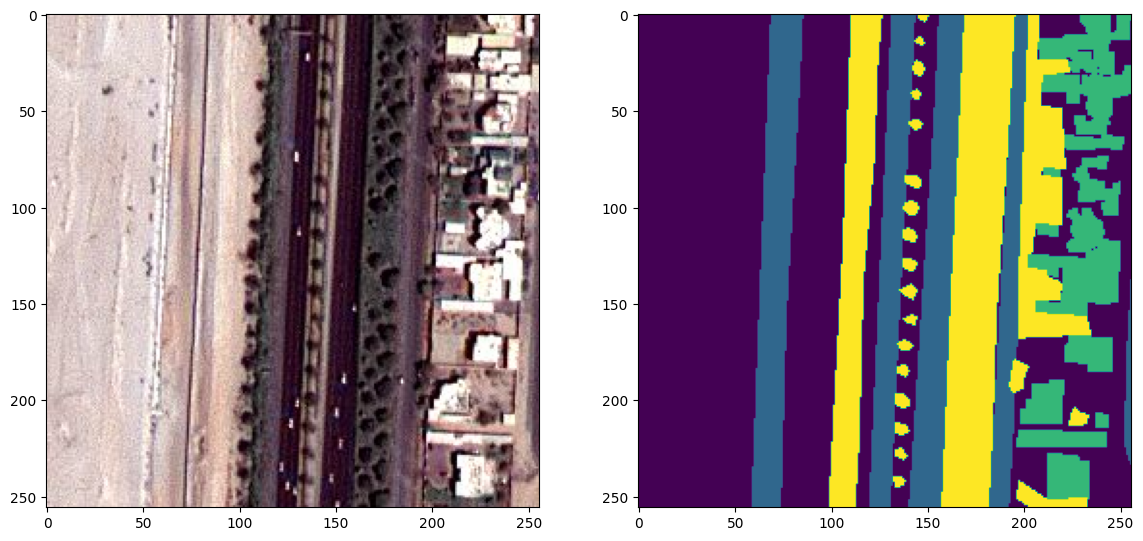

In [137]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
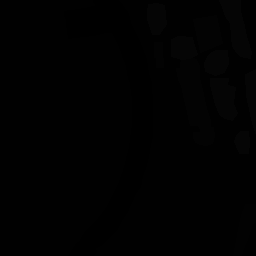

In [138]:
#what has been used in order to process the image below
labels[0][:,:,0]

at this point , we have the final dataset , our dataset that we need to train and test

In [143]:
#
total_classes = len(np.unique(labels))

In [144]:
total_classes

6

In [145]:
from tensorflow.keras.utils import to_categorical

In [146]:
labels_categorical_dataset = to_categorical(labels,num_classes = total_classes)

In [149]:
labels_categorical_dataset

array([[[[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0.

In [150]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [153]:
master_training_dataset.shape

(945, 256, 256, 3)

In [151]:
master_training_dataset = image_dataset

In [152]:
from sklearn.model_selection import train_test_split

In [154]:
x_train, x_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset,test_size=0.15, random_state=100)

In [156]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [157]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [158]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6
